# Map_GeoJSON_Point_Type

## Map a GeoJSON Point
First, we'll add single point on our map using GeoJSON data. The following GeoJSON data is a FeatureCollection object that has properties and geometry for the San Francisco Airport:

In [ ]:
// Add GeoJSON data.
let sanFranAirport =
{"type":"FeatureCollection","features":[{
    "type":"Feature",
    "properties":{
        "id":"3469",
        "name":"San Francisco International Airport",
        "city":"San Francisco",
        "country":"United States",
        "faa":"SFO",
        "icao":"KSFO",
        "alt":"13",
        "tz-offset":"-8",
        "dst":"A",
        "tz":"America/Los_Angeles"},
        "geometry":{
            "type":"Point",
            "coordinates":[-122.375,37.61899948120117]}}
]};

Since we are going to add the San Francisco Airport to our map, let's change the center to the San Francisco Airport. Add the following code to our logic.js file to create the center of the map at the airport with a zoom level of "10."

In [ ]:
// Create the map object with center at the San Francisco airport.
let map = L.map('mapid').setView([37.5, -122.5], 10);

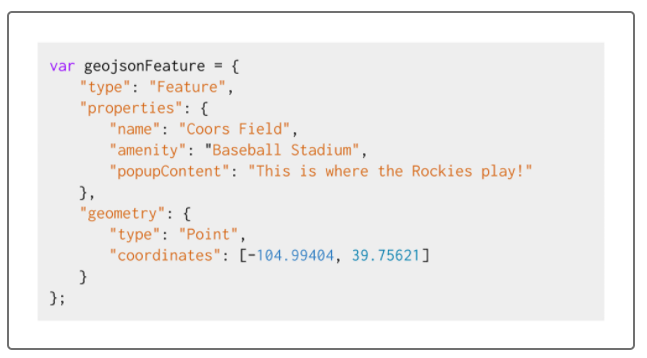

GeoJSON objects are added to the map through a GeoJSON layer, L.geoJSON(). In "The GeoJSON Layer" section, it says to create the GeoJSON layer and add it to our map. We can use the following code to do that:

In [ ]:
L.geoJSON(geojsonFeature).addTo(map);

Let's edit this GeoJSON layer as follows:

In [ ]:
// Grabbing our GeoJSON data.
L.geoJSON(sanFranAirport).addTo(map);

Also, add it to our logic.js file below the GeoJSON airport data and above the tileLayer()method. After you save the logic.js file, it should look like the following:

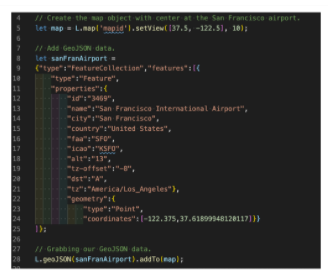

### NOTE
Please note that the coordinates appear in reverse order [-122.375, 37.61899948120117], compared to their order in the setView() method. This is because the GeoJSON data coordinates are set with the first parameter as X (longitude) and the second parameter as Y (latitude), as documented in the GeoJSON Standard.  The L.geoJSON()layer reverses the coordinates to plot them on the map.

Open the index.html file in your browser. Your map should have a marker at SFO.

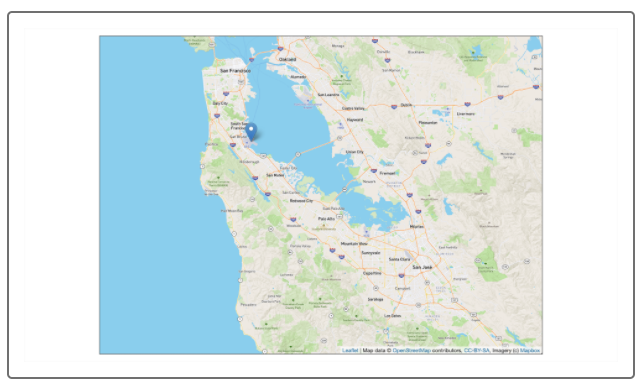

## Bind a Popup to the Marker

### REWIND
To display data on a map with a popup marker, we have to bind the marker with the GeoJSON layer, L.geoJSON(), using a callback function.

Our options to add data to a marker are to use the pointToLayer or onEachFeature callback functions. With either of these functions, we can add data to a map from each GeoJSON object. The major difference between the two functions is that the pointToLayer callback function adds markers to a map, whereas the onEachFeature callback function allows you to add styling and bind data to a popup marker.

Let's look at these two functions more closely.

### The pointToLayer Function

For the pointToLayer callback function, the basic syntax for adding functionality to a marker follows:

In [ ]:
L.geoJson(data, {
    pointToLayer: function(feature, latlng) {
      return L.marker(latlng);
     }
});

Let's break down what is happening in the L.geoJSON() layer:

We add two arguments: the data and the pointToLayer callback function.
    
The data will be our sanFranAirport data.

For the pointToLayer callback function, we are first going to call a function() where we pass each GeoJSON feature as feature, and its latitude and longitude as latlng.

Then we add a marker for each feature with a latitude and longitude in the pointToLayer callback function argument by using return L.marker(latlng).

Even though we have a marker on the previous map, let's edit our logic.js file to add a marker using the pointToLayer function and add data to a popup marker.

First, let's edit the logic.js file to add the pointToLayer callback function to the L.geoJSON() layer. To better understand what is passed with the feature argument in the function(), we will add feature in the console.log()function. Edit your L.geoJSON() layer code to look like the following:

In [ ]:
// Grabbing our GeoJSON data.
L.geoJson(sanFranAirport, {
    // We turn each feature into a marker on the map.
    pointToLayer: function(feature, latlng) {
      console.log(feature);
      return L.marker(latlng);
    }

  }).addTo(map);

Save your logic.js file and open the index.html file in your browser. The map should look the same as it did before the edits. However, if we open the console on our developer tools, we will see that the feature is the JavaScript object geometry and properties of our GeoJSON object.

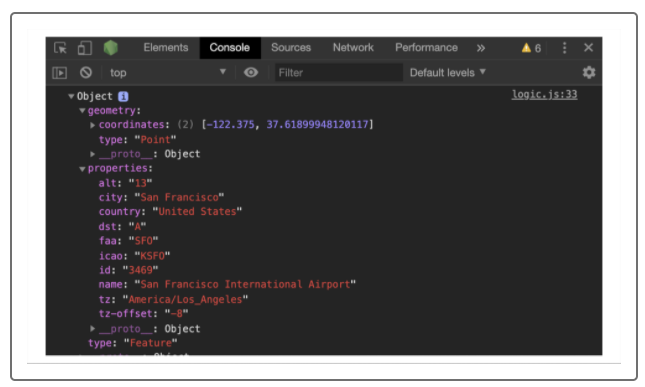

Now, we'll add the data in the JavaScript objects to a popup marker.

### REWIND
The properties in each JavaScript object can be accessed using the dot notation.

To add a popup marker, we need to use the bindPopup() method to the pointToLayer callback function. This will add a popup marker for each object in our GeoJSON data even though we only have one object in our data, SFO.

Let's add the city to the popup marker. In our logic.js file, after the return L.marker(latlng) in our L.geoJSON() layer, add the following code on the next line:

In [ ]:
.bindPopup("<h2>" + feature.properties.city + "</h2>")

Using the dot notation, we can traverse through the JSON object to get the city by using feature.properties.city. Now, your logic.js file with L.geoJSON() layer should look like the following:



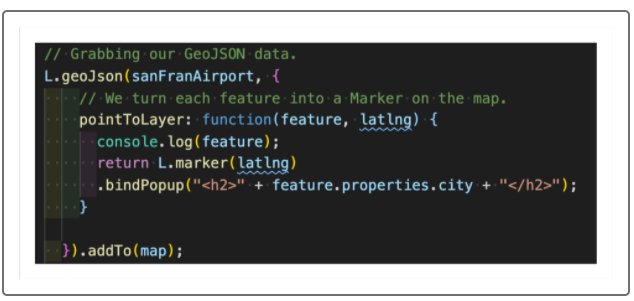

Our map should look like the following, where a marker, when clicked, shows a city name:

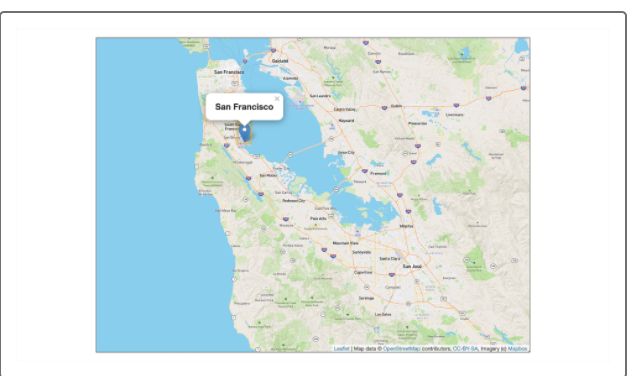

## The onEachFeature Function
When we use the onEachFeature callback function we can add a popup marker for each feature and add data from the properties of the JavaScript object. The basic syntax for adding functionality to a marker follows:

In [ ]:
L.geoJson(data, {
    onEachFeature: function(feature, layer) {
      layer.bindPopup();
     }
});

Let's break down what is happening in the L.geoJSON() layer:

First, we add two arguments: the data and the onEachFeature callback function.

The data will be our sanFranAirport data.

With the onEachFeature callback function we are first going to call an anonymous function, function(), where we pass each GeoJSON feature as feature, and any properties to the second argument, layer.

Let's edit our logic.js file to add a popup marker using the onEachFeature function. First, edit the logic.js file to add the onEachFeature callback function to the L.geoJSON() layer. To see what is passed with the layer argument in the anonymous function(), we'll pass layer in the console.log()function. Edit your L.geoJSON() layer code to look like the following:

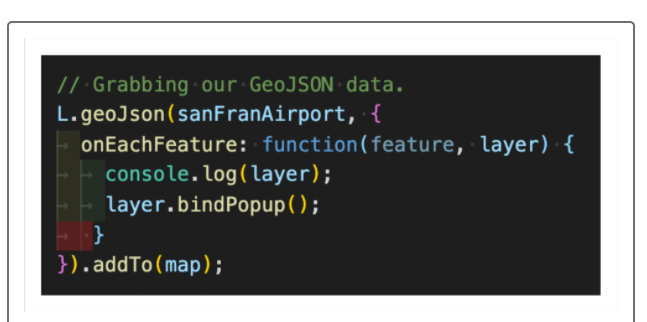

When we open our index.html file, the map will display a popup marker for SFO. When we open the console on our DevTools, we'll see that the layer returns many JavaScript methods that can be accessed and used, including the geometry and properties of our GeoJSON object.

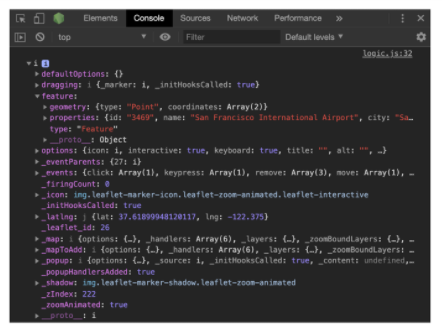